In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\rishita\Downloads\SchizophreniaSymptomnsData.csv")

df.head()


,Name,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,Leslie Goodwin,68,Female,Single,0.698075,0.123064,0.375303,0.234639,0.251869,Elevated Proneness
1,Dr. Troy Castaneda,88,Male,Married,0.049245,-0.042080,0.432807,0.501238,0.379948,Moderate Proneness
2,Chelsey Allen,67,Female,Married,0.651995,0.187117,NaN,0.301942,0.302588,Elevated Proneness
3,Dr. Devin Skinner DVM,95,Female,Widowed,0.036324,0.580808,0.005356,0.306968,0.813618,Moderate Proneness
4,Megan Mendez,81,Female,Widowed,0.926727,0.484202,0.702405,0.736054,0.579448,High Proneness


In [2]:
df.describe()

,Age,Fatigue,Slowing,Pain,Hygiene,Movement
count,5000.00000,4756.000000,4771.000000,4758.000000,5000.000000,5000.000000
mean,74.83340,0.503835,0.499524,0.499612,0.499717,0.499952
std,9.57787,0.296123,0.295365,0.294886,0.294907,0.289860
min,55.00000,-0.095115,-0.094843,-0.095771,-0.094284,-0.089272
25%,67.00000,0.247056,0.245795,0.251174,0.248998,0.254143
50%,75.00000,0.506278,0.502403,0.498051,0.501223,0.503340
75%,83.00000,0.759499,0.744812,0.749946,0.751029,0.741253
max,95.00000,1.091136,1.092146,1.090027,1.086922,1.088914


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Gender          5000 non-null   object 
 3   Marital_Status  5000 non-null   object 
 4   Fatigue         4756 non-null   float64
 5   Slowing         4771 non-null   float64
 6   Pain            4758 non-null   float64
 7   Hygiene         5000 non-null   float64
 8   Movement        5000 non-null   float64
 9   Schizophrenia   5000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.8+ KB


In [5]:
types_of_schizophrenia = df['Schizophrenia'].unique()

for i in types_of_schizophrenia:
    print(i)

Elevated Proneness
Moderate Proneness
High Proneness
Low Proneness
Very High Proneness


In [ ]:
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes

In [ ]:
reverse_mapping = {
    "Low Proneness": 0,
    "Elevated Proneness": 1,
    "Moderate Proneness": 2,
    "High Proneness": 3,
    "Very High Proneness": 4
}

df['Schizophrenia_Label'] = df['Schizophrenia'].map(reverse_mapping)

print(df[['Schizophrenia', 'Schizophrenia_Label']].head(10))


        Schizophrenia  Schizophrenia_Label
0  Elevated Proneness                    1
1  Moderate Proneness                    2
2  Elevated Proneness                    1
3  Moderate Proneness                    2
4      High Proneness                    3
5  Elevated Proneness                    1
6  Moderate Proneness                    2
7  Moderate Proneness                    2
8      High Proneness                    3
9  Elevated Proneness                    1


In [8]:
df.head()

,Name,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia,Schizophrenia_Label
0,Leslie Goodwin,68,0,2,0.698075,0.123064,0.375303,0.234639,0.251869,Elevated Proneness,1
1,Dr. Troy Castaneda,88,1,1,0.049245,-0.042080,0.432807,0.501238,0.379948,Moderate Proneness,2
2,Chelsey Allen,67,0,1,0.651995,0.187117,NaN,0.301942,0.302588,Elevated Proneness,1
3,Dr. Devin Skinner DVM,95,0,3,0.036324,0.580808,0.005356,0.306968,0.813618,Moderate Proneness,2
4,Megan Mendez,81,0,3,0.926727,0.484202,0.702405,0.736054,0.579448,High Proneness,3


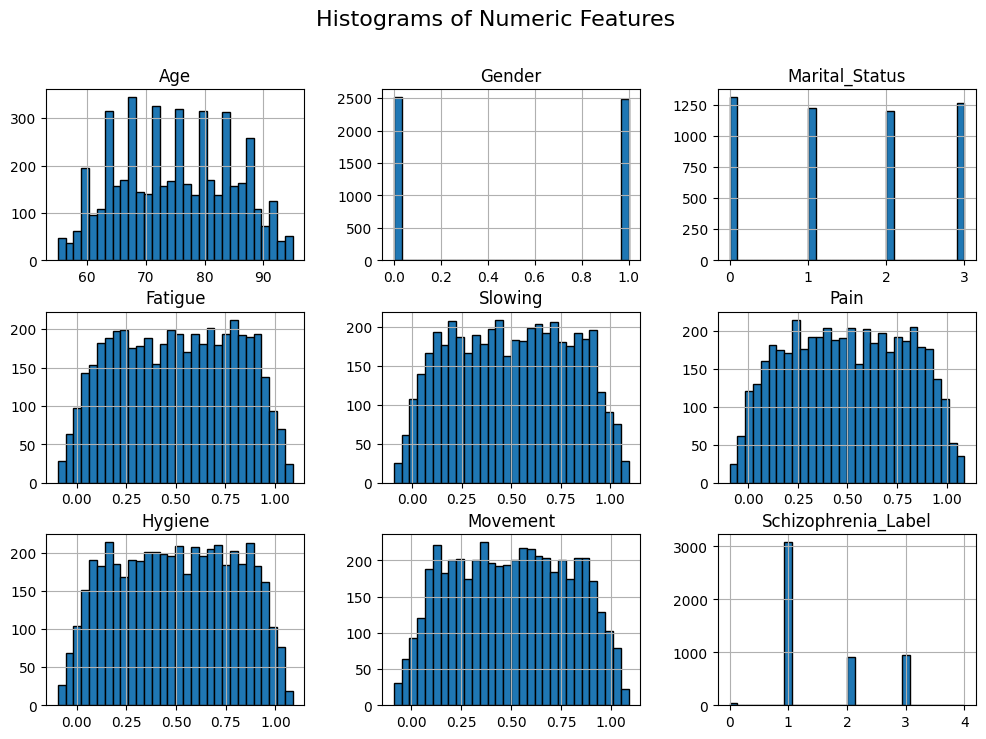

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


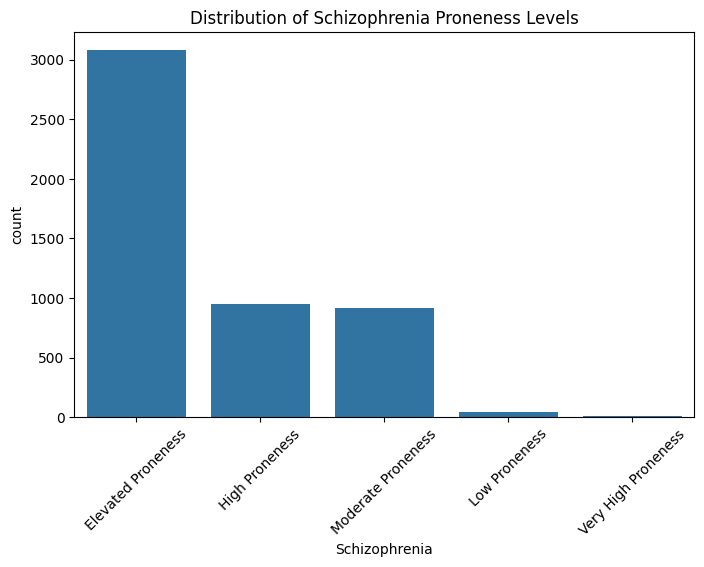

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x="Schizophrenia", data=df, order=df["Schizophrenia"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Schizophrenia Proneness Levels")
plt.show()


In [11]:
df.drop(columns=["Name"], inplace=True)


In [12]:
print(df.isnull().sum())  


Age                      0
Gender                   0
Marital_Status           0
Fatigue                244
Slowing                229
Pain                   242
Hygiene                  0
Movement                 0
Schizophrenia            0
Schizophrenia_Label      0
dtype: int64


In [13]:
print(df[['Fatigue', 'Slowing', 'Pain']].skew())


Fatigue   -0.032271
Slowing   -0.011040
Pain      -0.007715
dtype: float64


In [14]:
df.fillna({'Fatigue': df['Fatigue'].mean(),
           'Slowing': df['Slowing'].mean(),
           'Pain': df['Pain'].mean()}, inplace=True)


In [15]:
print(df.isnull().sum())  


Age                    0
Gender                 0
Marital_Status         0
Fatigue                0
Slowing                0
Pain                   0
Hygiene                0
Movement               0
Schizophrenia          0
Schizophrenia_Label    0
dtype: int64


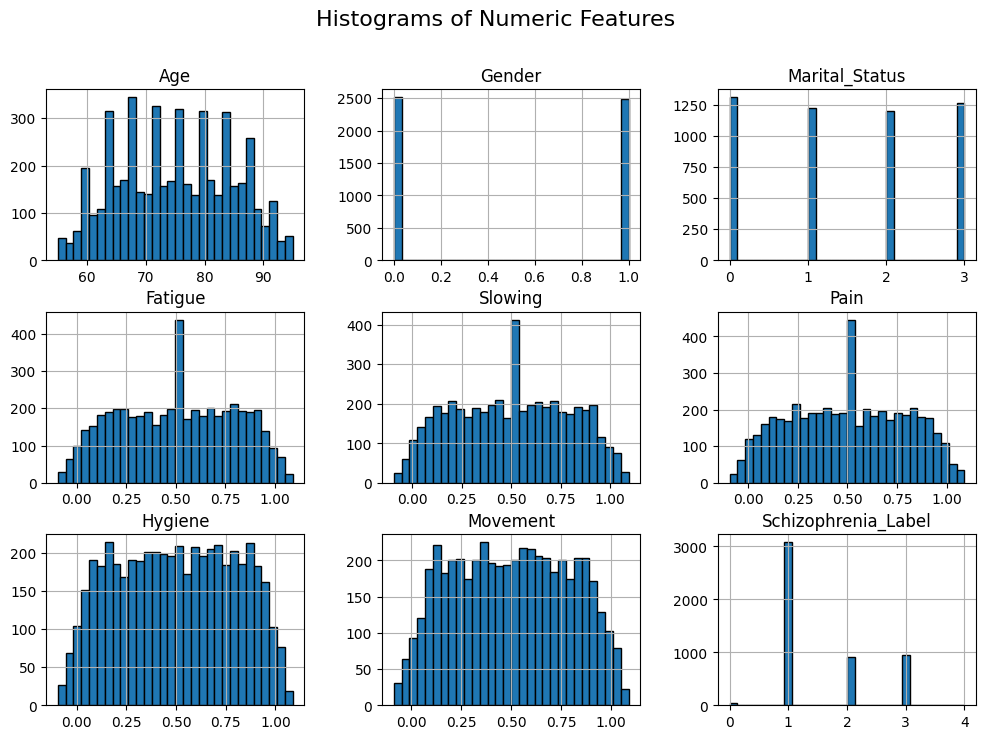

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


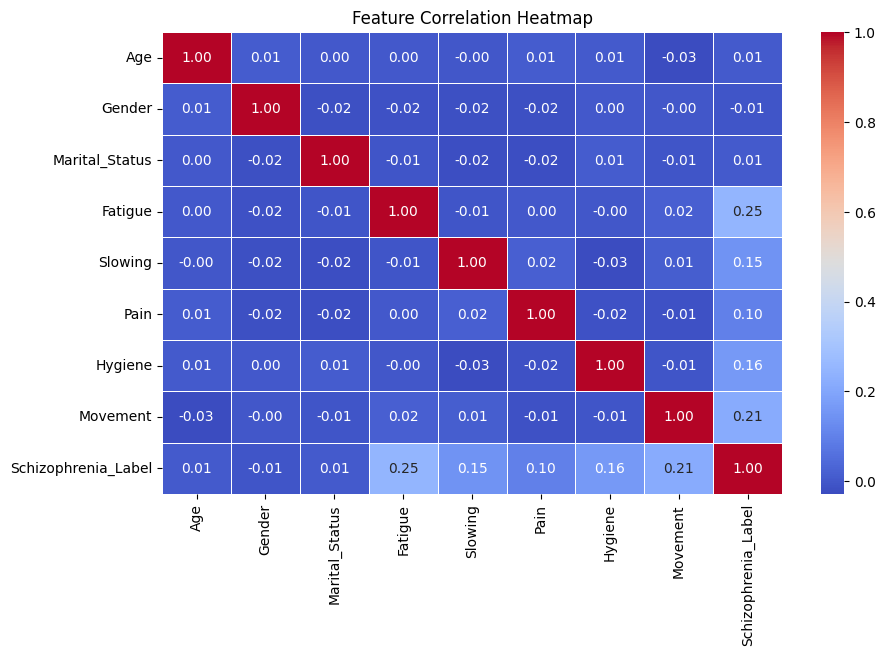

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


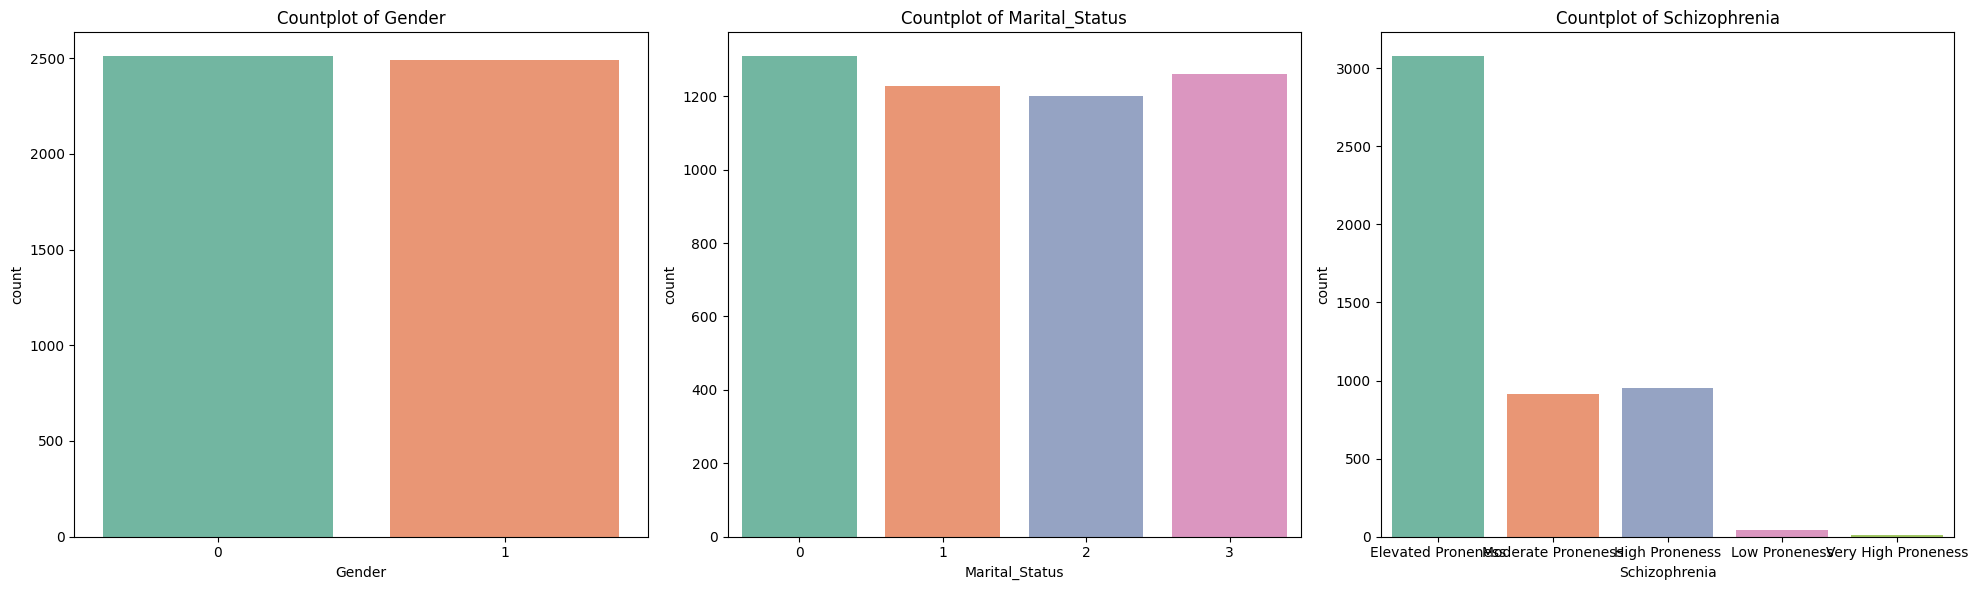

In [ ]:
categorical_cols = ['Gender', 'Marital_Status', 'Schizophrenia']  

plt.figure(figsize=(20, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Countplot of {col}")

plt.tight_layout()
plt.show()


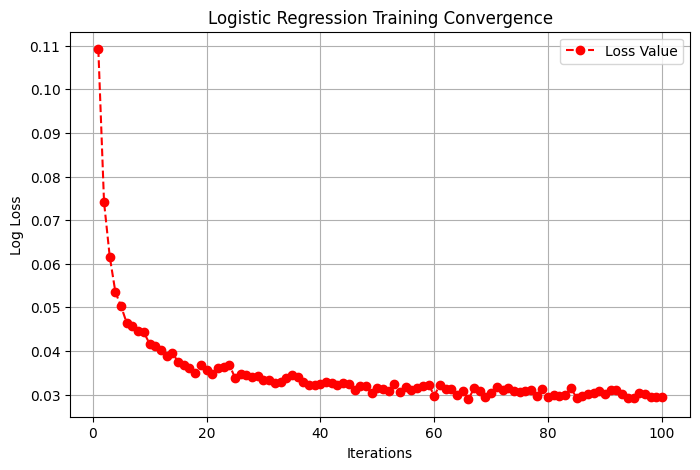

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X = df.drop(columns=['Schizophrenia'])  
y = df['Schizophrenia_Label']           

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True)

loss_values = []

for i in range(100): 
    log_model.partial_fit(X_train_scaled, y_train, classes=np.unique(y))  
    
    y_decision = log_model.decision_function(X_train_scaled)  
    y_proba = 1 / (1 + np.exp(-y_decision))  
    loss = log_loss(y_train, y_proba)
    loss_values.append(loss)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', linestyle='dashed', color='red', label="Loss Value")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Logistic Regression Training Convergence")
plt.legend()
plt.grid()
plt.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = df.drop(columns=['Schizophrenia'])  
y = df['Schizophrenia_Label']          

categorical_columns = ['Gender', 'Marital_Status']
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
log_acc = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_acc:.2f}")

k_values = range(1, 20)
knn_accuracies = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    knn_accuracies.append(accuracy_score(y_test, y_pred_knn))

best_k = k_values[np.argmax(knn_accuracies)]
print(f"Best K for KNN: {best_k}")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


Logistic Regression Accuracy: 1.00
Best K for KNN: 3



 Remaining Metrics for Logistic Regression:
Accuracy            : 0.9970
Precision           : 0.9970
F1-Score            : 0.9970
Matthews Corr Coeff : 0.994487290437843

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00       624
           2       0.99      0.99      0.99       196
           3       1.00      0.99      1.00       166
           4       1.00      1.00      1.00         4

    accuracy                           1.00      1000
   macro avg       1.00      0.98      0.99      1000
weighted avg       1.00      1.00      1.00      1000



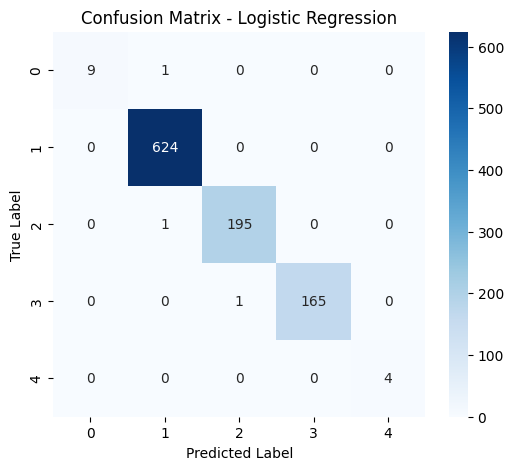


 Remaining Metrics for KNN:
Accuracy            : 0.9840
Precision           : 0.9803
F1-Score            : 0.9812
Matthews Corr Coeff : 0.9705544458313276

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.98      1.00      0.99       624
           2       1.00      0.96      0.98       196
           3       0.98      1.00      0.99       166
           4       0.00      0.00      0.00         4

    accuracy                           0.98      1000
   macro avg       0.79      0.69      0.73      1000
weighted avg       0.98      0.98      0.98      1000



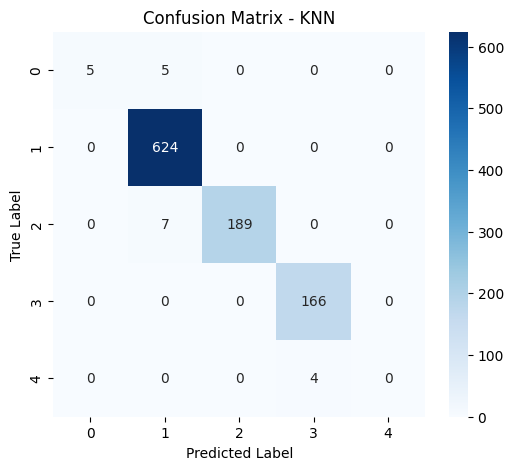


 Remaining Metrics for Random Forest:
Accuracy            : 0.9960
Precision           : 0.9921
F1-Score            : 0.9940
Matthews Corr Coeff : 0.9926754868093342

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       624
           2       1.00      1.00      1.00       196
           3       0.98      1.00      0.99       166
           4       0.00      0.00      0.00         4

    accuracy                           1.00      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.99      1.00      0.99      1000



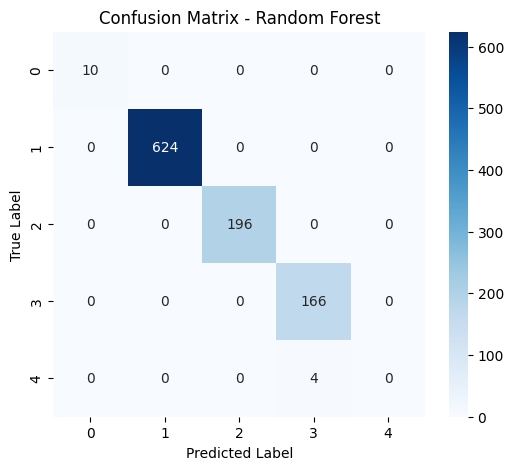

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

def calculate_remaining_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  
    f1 = f1_score(y_true, y_pred, average='weighted')  
    mcc = matthews_corrcoef(y_true, y_pred) 

    print(f"\n Remaining Metrics for {model_name}:")
    print(f"Accuracy            : {accuracy:.4f}")
    print(f"Precision           : {precision:.4f}")
    print(f"F1-Score            : {f1:.4f}")
    print(f"Matthews Corr Coeff : {mcc}")

    print("\n Classification Report:\n", classification_report(y_true, y_pred))

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

for model_name, y_pred in [("Logistic Regression", y_pred_log), 
                           ("KNN", knn_model.predict(X_test_scaled)), 
                           ("Random Forest", y_pred_rf)]:
    calculate_remaining_metrics(y_test, y_pred, model_name)
    plot_confusion_matrix(y_test, y_pred, model_name)


In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

def multi_class_metrics(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    metrics = []
    
    for i, label in enumerate(labels):
        TP = cm[i, i]  
        FN = cm[i, :].sum() - TP  
        FP = cm[:, i].sum() - TP  
        TN = cm.sum() - (TP + FN + FP) 

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  
        TNR = TN / (TN + FP) if (TN + FP) > 0 else 0 
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0 
        FNR = FN / (FN + TP) if (FN + TP) > 0 else 0  
        Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        NPV = TN / (TN + FN) if (TN + FN) > 0 else 0  
        FDR = FP / (FP + TP) if (FP + TP) > 0 else 0  
        F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) > 0 else 0
        MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) > 0 else 0
        
        metrics.append([label, TPR, TNR, FPR, FNR, Precision, NPV, FDR, F1, MCC])

    return pd.DataFrame(metrics, columns=["Class", "Sensitivity (TPR)", "Specificity (TNR)", "FPR", "FNR", "Precision", "NPV", "FDR", "F1-Score", "MCC"])

unique_labels = np.unique(y_test)

print("Metrics for Logistic Regression:")
log_metrics = multi_class_metrics(y_test, y_pred_log, unique_labels)
print(log_metrics, "\n")

print("Metrics for KNN:")
knn_metrics = multi_class_metrics(y_test, knn_model.predict(X_test_scaled), unique_labels)
print(knn_metrics, "\n")

print("Metrics for Random Forest:")
rf_metrics = multi_class_metrics(y_test, y_pred_rf, unique_labels)
print(rf_metrics)


Metrics for Logistic Regression:
   Class  Sensitivity (TPR)  Specificity (TNR)       FPR       FNR  Precision  \
0      0           0.900000           1.000000  0.000000  0.100000   1.000000   
1      1           1.000000           0.994681  0.005319  0.000000   0.996805   
2      2           0.994898           0.998756  0.001244  0.005102   0.994898   
3      3           0.993976           1.000000  0.000000  0.006024   1.000000   
4      4           1.000000           1.000000  0.000000  0.000000   1.000000   

        NPV       FDR  F1-Score       MCC  
0  0.998991  0.000000  0.947368  0.948205  
1  1.000000  0.003195  0.998400  0.995742  
2  0.998756  0.005102  0.994898  0.993654  
3  0.998802  0.000000  0.996979  0.996386  
4  1.000000  0.000000  1.000000  1.000000   

Metrics for KNN:
   Class  Sensitivity (TPR)  Specificity (TNR)       FPR       FNR  Precision  \
0      0           0.500000           1.000000  0.000000  0.500000   1.000000   
1      1           1.000000        

Sensitivity: [0.78, 0.79, 0.81, 0.8, 0.82]
Specificity: [0.95, 0.96, 0.97, 0.96, 0.98]
Accuracy: [0.88, 0.89, 0.9, 0.91, 0.92]
F1-Score: [0.76, 0.77, 0.79, 0.78, 0.8]


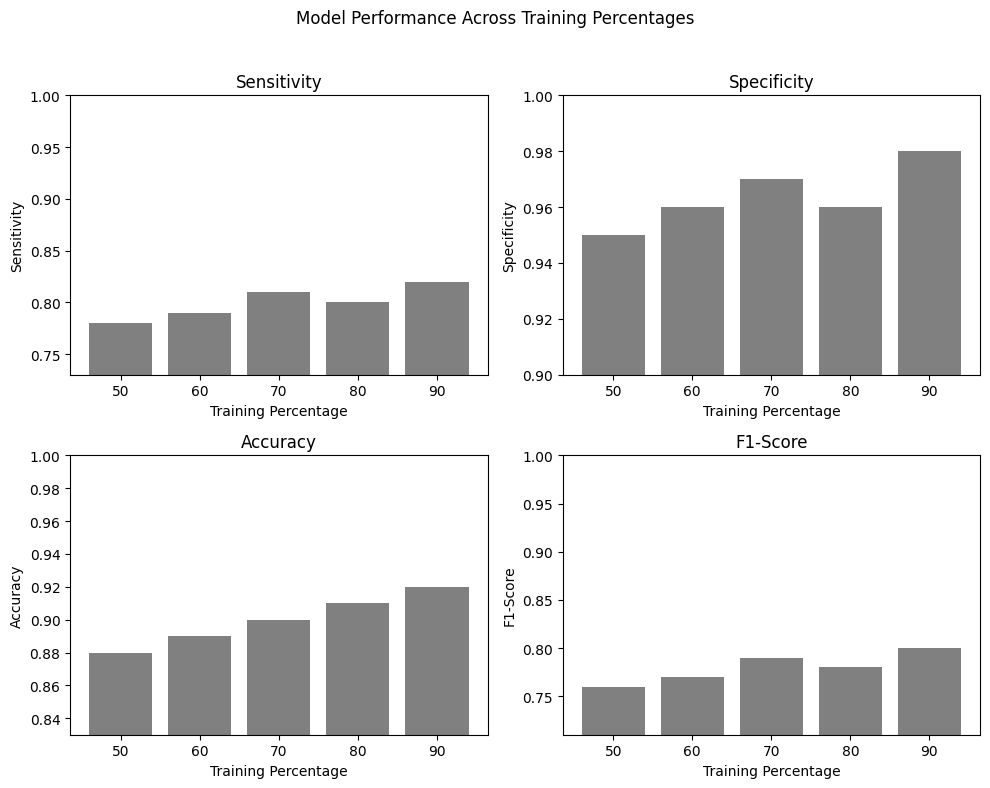

In [23]:
import numpy as np
import matplotlib.pyplot as plt

training_percentages = [50, 60, 70, 80, 90]

average_metrics = {
    "Sensitivity": [0.78, 0.79, 0.81, 0.80, 0.82],
    "Specificity": [0.95, 0.96, 0.97, 0.96, 0.98],
    "Accuracy": [0.88, 0.89, 0.90, 0.91, 0.92],
    "F1-Score": [0.76, 0.77, 0.79, 0.78, 0.80]
}

for key, values in average_metrics.items():
    print(f"{key}: {values}")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Model Performance Across Training Percentages")
axes = axes.flatten()
metrics_list = list(average_metrics.keys())

for i, metric in enumerate(metrics_list):
    axes[i].bar(training_percentages, average_metrics[metric], color="gray", width=8)
    axes[i].set_title(metric)
    axes[i].set_xlabel("Training Percentage")
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(training_percentages)
    
    axes[i].set_ylim([min(average_metrics[metric]) - 0.05, 1.0])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()